In [72]:
import graph_tool as gt
import graph_tool.draw as gtd
import numpy as np
from graph_tool import spectral
from graph_tool import generation
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
output = "/Users/endingalaporte/Desktop/GDV_orbit/output" #where the code is located
input_path = "/Users/endingalaporte/Desktop/GDV_orbit/input"

def hist(array : np.ndarray):
    """
    given array of integer values,
    returns the histogram of consecutive integer values without hole
    """
    bins = np.append(np.arange(0,array.max()+1)-0.5,array.max()+0.5)
    return np.histogram(array, bins = bins)[0]

def d(e : gt.Edge):
    """given an edge, returns the manhattan distance of their respective vertex property vector"""
    v = e.source()
    u = e.target()
    x = v_deg_prop_map[int(u)]
    y = v_deg_prop_map[int(v)]
    distance = np.sum(np.abs(x-y))
    return distance

#store edgelist txt
def store_edgelist(g_ : nx.classes.graph.Graph, name):
    """given the networkx graph, and its name, save the edgeslist in a text using his name"""
    o_f = '/Users/endingalaporte/Desktop/'
    file = "/edgelist_"+str(name)+"_partition.txt"
    output_path = o_f + file
    nx.write_edgelist(g_, output_path, data = False)
    
def read_orbit_count(path):
    """given path where the orbits counts in csv are, return the vertex property map as an array"""
    df = pd.read_csv(path)
    df = df.to_numpy()
    df = df[:,1:df.shape[1]]
    return df

edge property map is  [ 4  4  6 11 24 24  1 10  5  3  3  4 26 24 13  8 12  7  5]


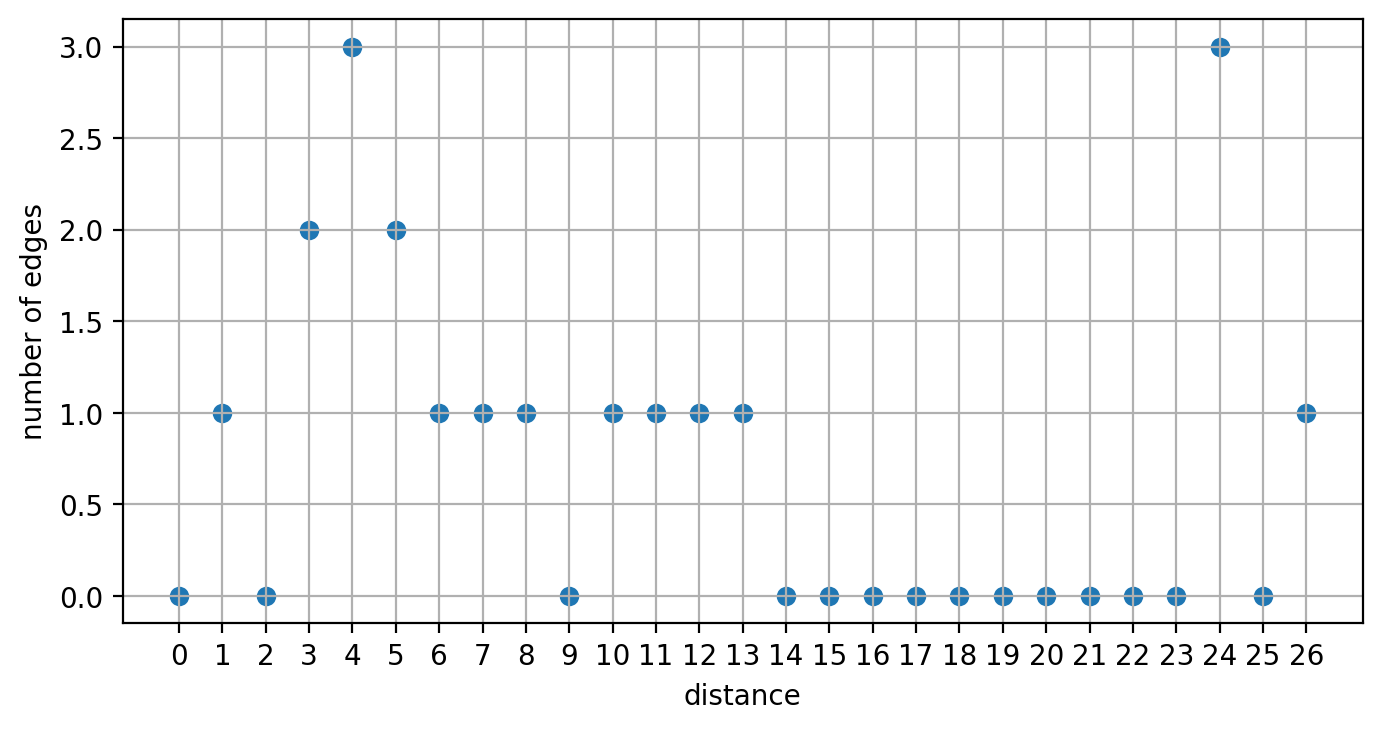

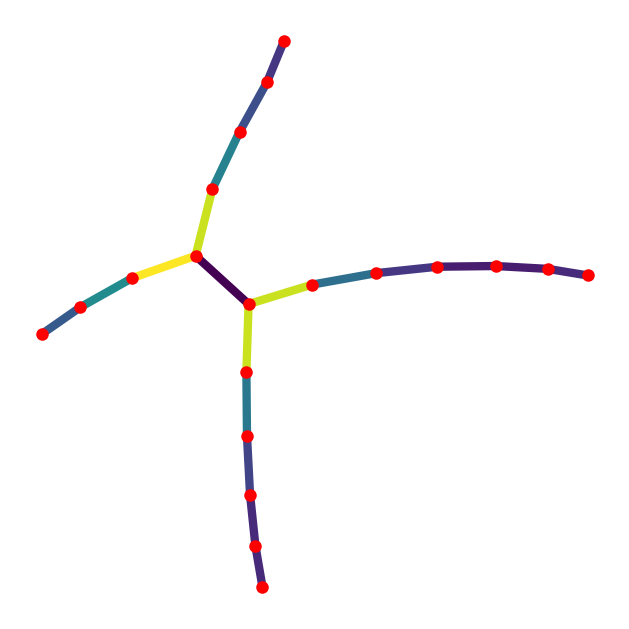

In [74]:
#create linegraph
G = gt.Graph(directed = False)
edgelist = np.array([[0,1],[1,2],[2,3],[3,4],
                     [4,5],[5,6],[6,7],[7,8],
                     [8,9],[9,10],[10,11],[5,12],
                     [12,13],[13,14],[14,15],
                     [12,16],[16,17],[17,18],
                     [18,19]])

G.add_edge_list(edgelist)
#gtd.graph_draw(G)

#import vertex property

v_deg_prop_map = read_orbit_count("/Users/endingalaporte/Desktop/GDV_orbit/input/edgelist_linegraph_orca_orbits.csv")

#compute edge property

e_prop_map = []
for e in G.edges():
    e_prop_map.append(d(e))
e_prop_map = np.array(e_prop_map)
e_prop_map = e_prop_map
print("edge property map is ",e_prop_map)


#plot and save histogram of edgeproperty

x = [str(i) for i in range(len(hist(e_prop_map)))]
plt.figure(figsize = (8,4), dpi = 200)
plt.grid()
plt.xlabel("distance")
plt.ylabel("number of edges")
plt.scatter(x, hist(e_prop_map))
plt.savefig(output + "/linegraph_orbit_edge_distance_histogram.svg")

#plot and save graph

A = spectral.adjacency(G)
A = A.toarray()
A.shape
g = nx.convert_matrix.from_numpy_matrix(A)
plt.figure(figsize = (4,4), dpi = 150)
nx.draw(g, edge_color=e_prop_map, node_color = "red", width = 4, node_size = 25)
store_edgelist(g, "linegraph")
plt.savefig(output + "/linegraph_orbit_edge_distance.svg")

edge property map is  [ 58  59  23 122  23 148  58 122  59 121  32  49  65  49  76 121  65  32
 154   8  60  15  60  15 154  15   8 161   8  60  15  60  15 161  15   8
 154  32  60  65  60  76 154  65  32 121  59  49 122  49 148 121 122  59
  58  23  23  58]


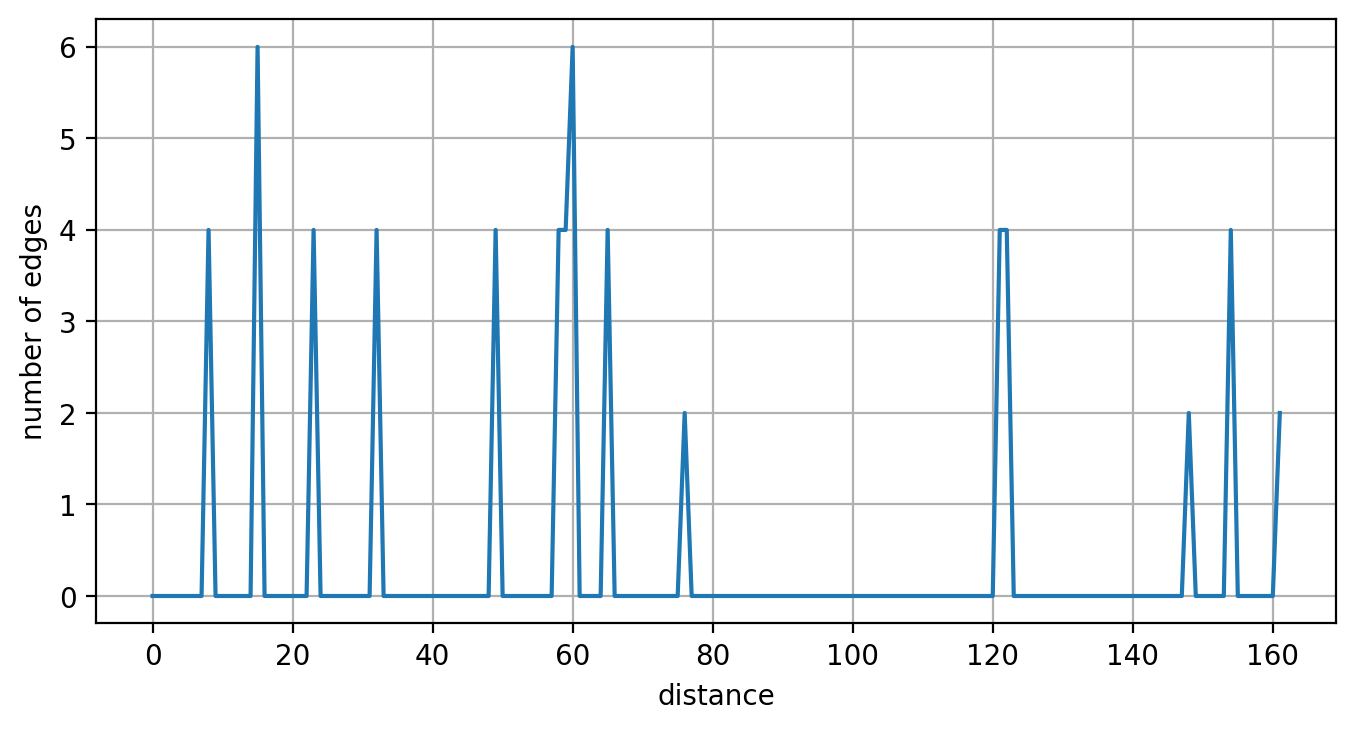

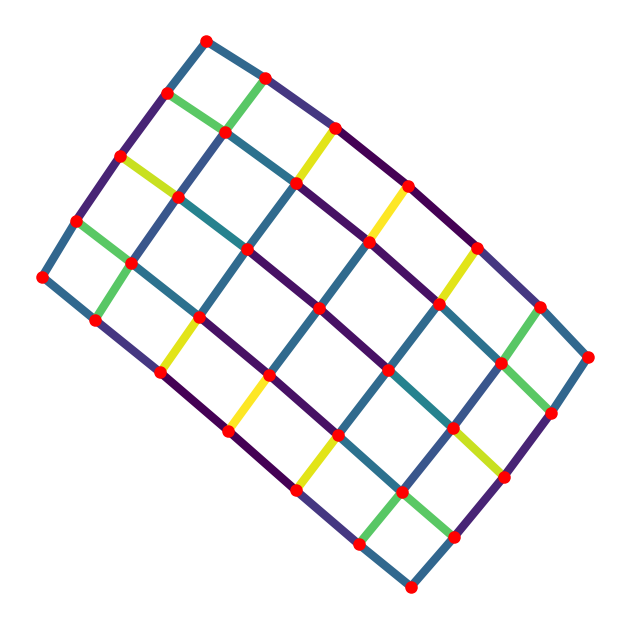

In [78]:
#lattice
G = gt.Graph(directed = False)
G = generation.lattice([5,7])
#gtd.graph_draw(G)

#import vertex property

v_deg_prop_map = read_orbit_count("/Users/endingalaporte/Desktop/GDV_orbit/input/edgelist_lattice_orca_orbits.csv")
v_deg_prop_map.shape

#compute the pairwise distance that is edge property 

e_prop_map = []
for e in G.edges():
    e_prop_map.append(d(e))
e_prop_map = np.array(e_prop_map)
e_prop_map = e_prop_map
print("edge property map is ",e_prop_map)

#plot and save histogram of edgeproperty

x = [str(i) for i in range(len(hist(e_prop_map)))]
plt.figure(figsize = (8,4), dpi = 200)
plt.grid()
plt.xlabel("distance")
plt.ylabel("number of edges")
plt.plot(hist(e_prop_map))
plt.savefig(output + "/lattice_orbit_edge_distance_histogram.svg")

#plot and save graph

A = spectral.adjacency(G)
A = A.toarray()
A.shape
g = nx.convert_matrix.from_numpy_matrix(A)
plt.figure(figsize = (4,4), dpi = 150)
nx.draw(g, edge_color=e_prop_map, node_color = "red", width = 4, node_size = 25)
store_edgelist(g, "lattice")
plt.savefig(output + "/lattice_orbit_edge_distance.svg")